<a href="https://colab.research.google.com/github/zhiyun-deng/222Lab1/blob/master/edge%20detection%20experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import statements
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math


Simple binary thresholding


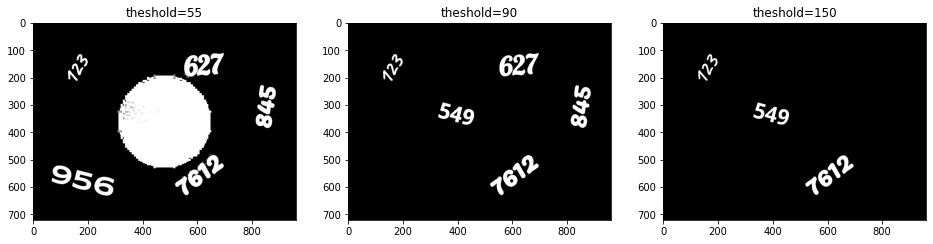

inverse binary thresholding


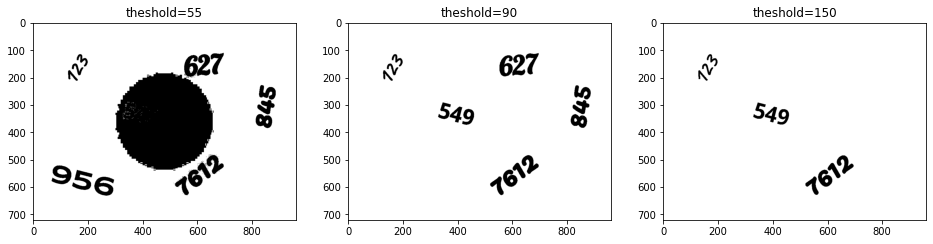

In [ ]:
img = cv2.imread('numbers.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#plt.imshow(img,cmap="gray")
print("Simple binary thresholding")
#initialize zero matrix, and set selected pixels to 255
img_thresh_55 = np.zeros_like(img)
img_thresh_55[img>55] = 255

img_thresh_90 = np.zeros_like(img)
img_thresh_90[img>90] = 255

img_thresh_150 = np.zeros_like(img)
img_thresh_150[img>150] = 255

plt.figure(figsize=(16,20))
plt.subplot(131),plt.imshow(img_thresh_55, cmap="gray"),plt.title("theshold=55")
plt.subplot(132),plt.imshow(img_thresh_90, cmap="gray"),plt.title("theshold=90")
plt.subplot(133),plt.imshow(img_thresh_150, cmap="gray"),plt.title("theshold=150")
plt.show()

print("inverse binary thresholding")
#the condition for matrix selection is reversed
img_thresh_55 = np.zeros_like(img)
img_thresh_55[img<55] = 255

img_thresh_90 = np.zeros_like(img)
img_thresh_90[img<90] = 255

img_thresh_150 = np.zeros_like(img)
img_thresh_150[img<150] = 255
#plot
plt.figure(figsize=(16,20))
plt.subplot(131),plt.imshow(img_thresh_55, cmap="gray"),plt.title("theshold=55")
plt.subplot(132),plt.imshow(img_thresh_90, cmap="gray"),plt.title("theshold=90")
plt.subplot(133),plt.imshow(img_thresh_150, cmap="gray"),plt.title("theshold=150")
plt.show()




Q.2 For simple thresholding: <LI> When threshold = 55, 5 numbers are visible: The numbers 123, 627, 956, 7612, 845, and 549 are white. However, the number 549 is covered by a white circle in the middle of the image.
<li>When threshold = 90, 5 numbers are visible: The numbers 123, 627, 7612, 845, and 549 are white. The number 549 is no longer covered by a white circle in the middle of the image. The circle is present because the background center is brighter than the background edges in the original image
<li>When threshold = 150, 3 numbers are visible: The numbers 123, 7612, and 549 are white. The number 549 is not covered by a white circle in the middle of the image.
<br>As the threshold increases in simple binary thresholding, the amount of white region decreases. 
<br><br>The results of inverse binary thesholding for any threshold is the reverse (black becomes white and white becomes black) of simple binary thresholding for that same threshold. Numbers visible for simple thresholding remains visible in inverse thresholding for that threshold, just in a different color.


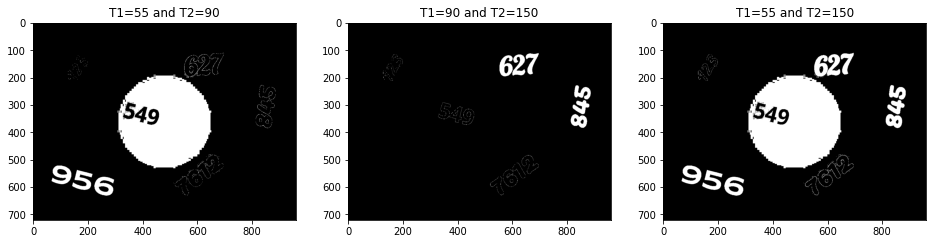

In [ ]:
#initialize zero matrix
img_thresh_1 = np.zeros_like(img)
#For each pixel of img, determine if the windowing condition is met
#then change selected pixel to 255 in the corresponding matrix
img_thresh_1[np.logical_and(img>55,img<90)] = 255

img_thresh_2 = np.zeros_like(img)
img_thresh_2[np.logical_and(img>90,img<150)] = 255

img_thresh_3 = np.zeros_like(img)
img_thresh_3[np.logical_and(img>55,img<150)] = 255

plt.figure(figsize=(16,20))
plt.subplot(131),plt.imshow(img_thresh_1, cmap="gray"),plt.title("T1=55 and T2=90")
plt.subplot(132),plt.imshow(img_thresh_2, cmap="gray"),plt.title("T1=90 and T2=150")
plt.subplot(133),plt.imshow(img_thresh_3, cmap="gray"),plt.title("T1=55 and T2=150")
plt.show()


Q3. We find a larger window causes more numbers to be segmented. For the first window, The number 956 is segmented. For the second window, the numbers 627 and 845 are segmented. For the third window, the numbers 956, 627, and 845 are segmented. Some edges of unsegmented numbers are visible, due to the transition between black and white in the original image. 

Q4. From the simple binary threholding (threshold = 150), we found that "123" and "549" both remained visible, meaning their values exceed 150 in the original grayscale. "7612" is also visible in that thresholded image. We then test the following. 

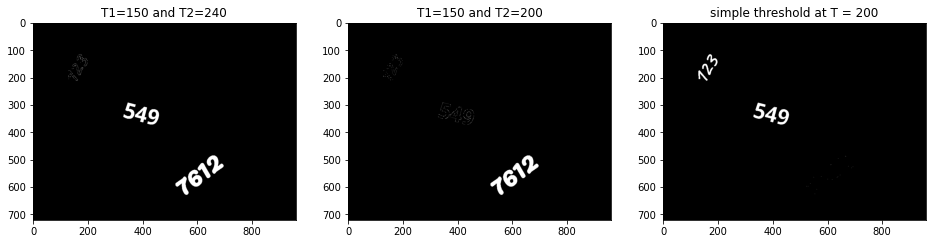

In [ ]:
img_thresh_1 = np.zeros_like(img)
img_thresh_1[np.logical_and(img>150,img<240)] = 255

img_thresh_2 = np.zeros_like(img)
img_thresh_2[np.logical_and(img>150,img<200)] = 255

img_thresh_3 = np.zeros_like(img)
img_thresh_3[img>200] = 255

plt.figure(figsize=(16,20))
plt.subplot(131),plt.imshow(img_thresh_1, cmap="gray"),plt.title("T1=150 and T2=240")
plt.subplot(132),plt.imshow(img_thresh_2, cmap="gray"),plt.title("T1=150 and T2=200")
plt.subplot(133),plt.imshow(img_thresh_3, cmap="gray"),plt.title("simple threshold at T = 200")
plt.show()

Since "123" no longer remains visible when look at the window between 150 and 240, we conclude "123" to have a value higher than 240 in the original grayscale. When we continue to take a look at the smaller window between 150 and 200, we find that only "7612" is visible. This means "123" and "549" have pixel strength higher than 200. Therefore, a simple binary threshold of 200 yields the correct result. 

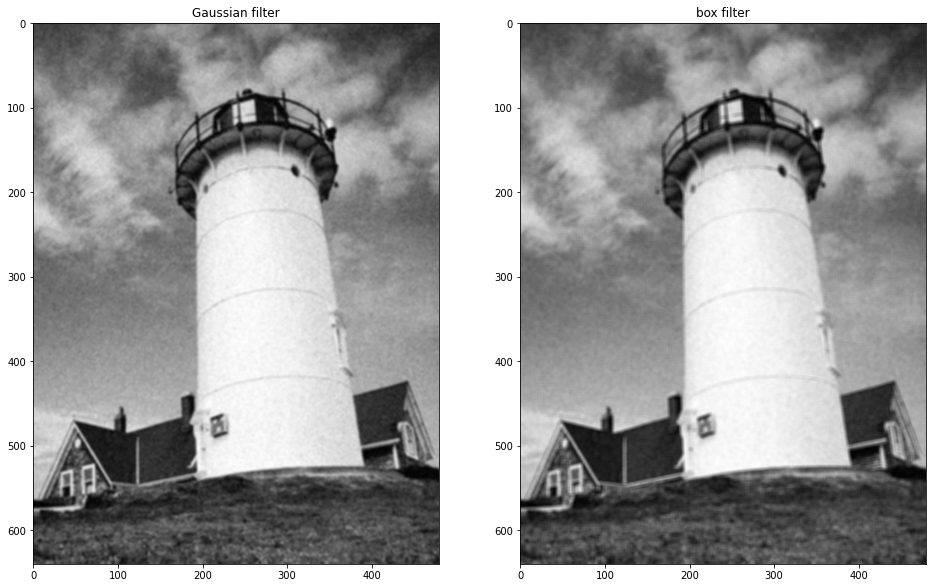

The PSNR for the Gaussian filtered image:  26.740281647948976
The PSNR for the box filtered image:  25.300013564257455


In [ ]:
#2. DENOISING
img = cv2.imread('lighthouse.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#plt.figure(figsize=(8,9))
#plt.imshow(img,cmap="gray")
img_n = cv2.imread('gaussian_lighthouse.png')
img_n = cv2.cvtColor(img_n, cv2.COLOR_BGR2GRAY)
img_filt_gaussian = cv2.GaussianBlur(img_n,(5,5),math.sqrt(2)) #variance = sigma squared
img_filt_box = cv2.blur(img_n,(5,5)) #the blur function performs normalized box filtering
plt.figure(figsize=(16,18))
plt.subplot(121), plt.imshow(img_filt_gaussian,cmap="gray"), plt.title('Gaussian filter')
plt.subplot(122), plt.imshow(img_filt_box,cmap="gray"),plt.title('box filter')
plt.show()

print("The PSNR for the Gaussian filtered image: ", cv2.PSNR(img,img_filt_gaussian))
print("The PSNR for the box filtered image: ", cv2.PSNR(img,img_filt_box))

Since the Gaussian filter yields an image with the higher peak signal to noise ratio, the Gaussian filter provides superior result

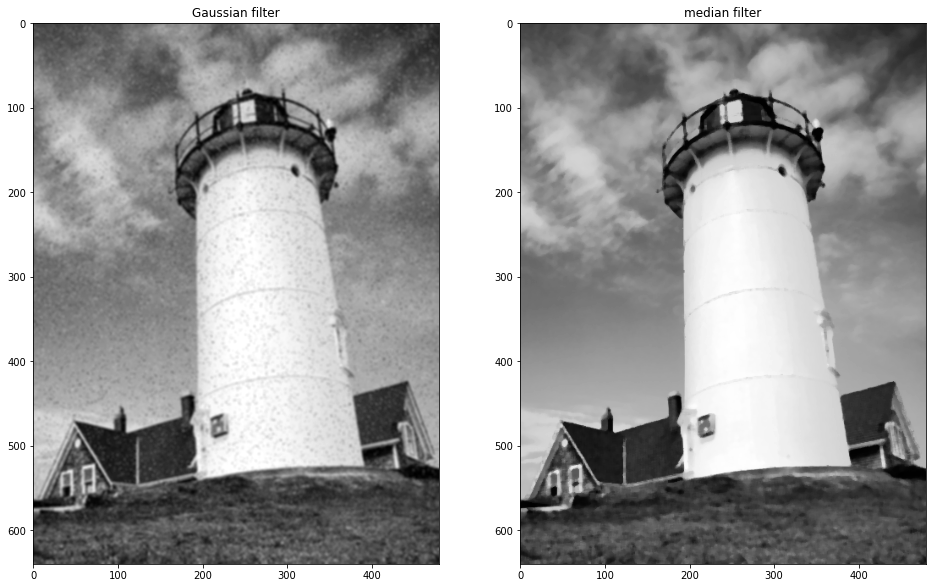

The PSNR for the Gaussian filtered image:  26.30020233930108
The PSNR for the median filtered image:  26.809189025548324


In [ ]:
#read image
img_n_salt = cv2.imread('saltandpepper_lighthouse.png')
img_n_salt = cv2.cvtColor(img_n_salt, cv2.COLOR_BGR2GRAY)
#Gaussian & median filter
img_filt_gaussian = cv2.GaussianBlur(img_n_salt,(5,5),math.sqrt(2))
img_filt_median = cv2.medianBlur(img_n_salt,5)

plt.figure(figsize=(16,18))
plt.subplot(121),plt.imshow(img_filt_gaussian,cmap="gray"),plt.title("Gaussian filter")
plt.subplot(122),plt.imshow(img_filt_median,cmap="gray"),plt.title("median filter")
plt.show()
print("The PSNR for the Gaussian filtered image: ", cv2.PSNR(img,img_filt_gaussian))
print("The PSNR for the median filtered image: ", cv2.PSNR(img,img_filt_median))

Since the median filter yields an image with the higher peak signal to noise ratio, the median filter provides superior result for salt-and-pepper noise.

3 x 3  Sobel


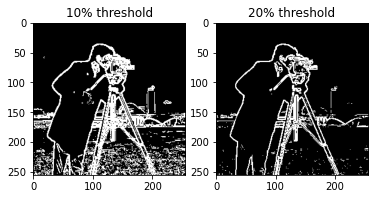

5 x 5  Sobel


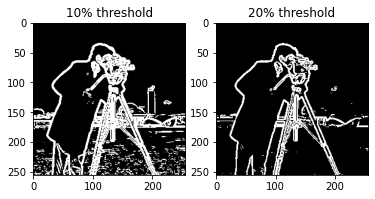

7 x 7  Sobel


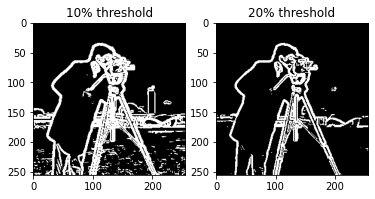

In [ ]:
#3. SOBEL EDGE DETECTOR
#read image
img = cv2.imread('cameraman.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap = "gray")

for i in range(3,9,2): #for Sobel matrix sizes 3,5,7
  print(i,"x",i," Sobel")
  I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=i) #x direction
  I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=i)#y direction
  I_m = cv2.magnitude(I_x, I_y) #combining x and y direction

  #thresholding
  I_res = np.zeros_like(I_m)
  I_res[I_m>(0.1*I_m.max())] = 255
  plt.subplot(121),plt.imshow(I_res,cmap="gray"),plt.title("10% threshold")
  I_res = np.zeros_like(I_m)
  I_res[I_m>(0.2*I_m.max())] = 255
  plt.subplot(122),plt.imshow(I_res,cmap="gray"),plt.title("20% threshold")
  plt.show()




As the filter size increases, the edges detected become thicker. In addition, the fine details become less visible when filtered


no denoising


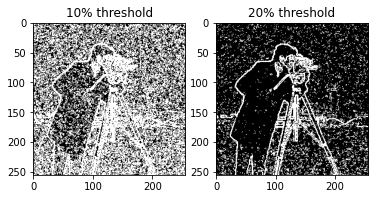

denoising


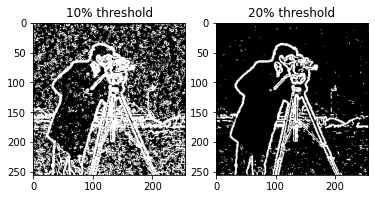

In [ ]:
img_n = img = cv2.imread('gaussian_cameraman.png', cv2.IMREAD_GRAYSCALE)
#plt.imshow(img,cmap = "gray")
print("no denoising")
#sobel
I_x = cv2.Sobel(img_n, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(img_n, cv2.CV_64F, 0, 1, ksize=3)
I_m = cv2.magnitude(I_x, I_y)
#threshold
I_res = np.zeros_like(I_m)
I_res[I_m>(0.1*I_m.max())] = 255
plt.subplot(121),plt.imshow(I_res,cmap="gray"),plt.title("10% threshold")
I_res = np.zeros_like(I_m)
I_res[I_m>(0.2*I_m.max())] = 255
plt.subplot(122),plt.imshow(I_res,cmap="gray"),plt.title("20% threshold")
plt.show()

print("denoising")
#smoothen with box filter, then sobel
I_denoised = cv2.blur(img_n,(3,3))
I_x = cv2.Sobel(I_denoised, cv2.CV_64F, 1, 0, ksize=3)
I_y = cv2.Sobel(I_denoised, cv2.CV_64F, 0, 1, ksize=3)
I_m = cv2.magnitude(I_x, I_y)
#threshold
I_res = np.zeros_like(I_m)
I_res[I_m>(0.1*I_m.max())] = 255
plt.subplot(121),plt.imshow(I_res,cmap="gray"),plt.title("10% threshold")
I_res = np.zeros_like(I_m)
I_res[I_m>(0.2*I_m.max())] = 255
plt.subplot(122),plt.imshow(I_res,cmap="gray"),plt.title("20% threshold")
plt.show()


From the above, we see that denoising with a box filter reduces the amount of noise that appear in the final image of edge detected. It seems to have a similar effect to increasing the threshold. 

# 4. CANNY EDGE DETECTION
The four main steps in canny edge detection are:
<li>Filter images with derivatives of Gaussian. This smooths out noise and highlight edges in a single operation.
<li>Find the magnitude and direction of intensity gradient. This is the strength and direction of edges.
<li>Use non-maximum suppression to reduce edges to 1 pixel thin. This is done by eliminating an edge pixel if there is another stronger edge pixel nearby.
<li>Use double thresholding to classify edge pixels as strong or weak, and then use linking (hysteresis) to convert weak pixels to strong ones if they are near another strong pixel. 

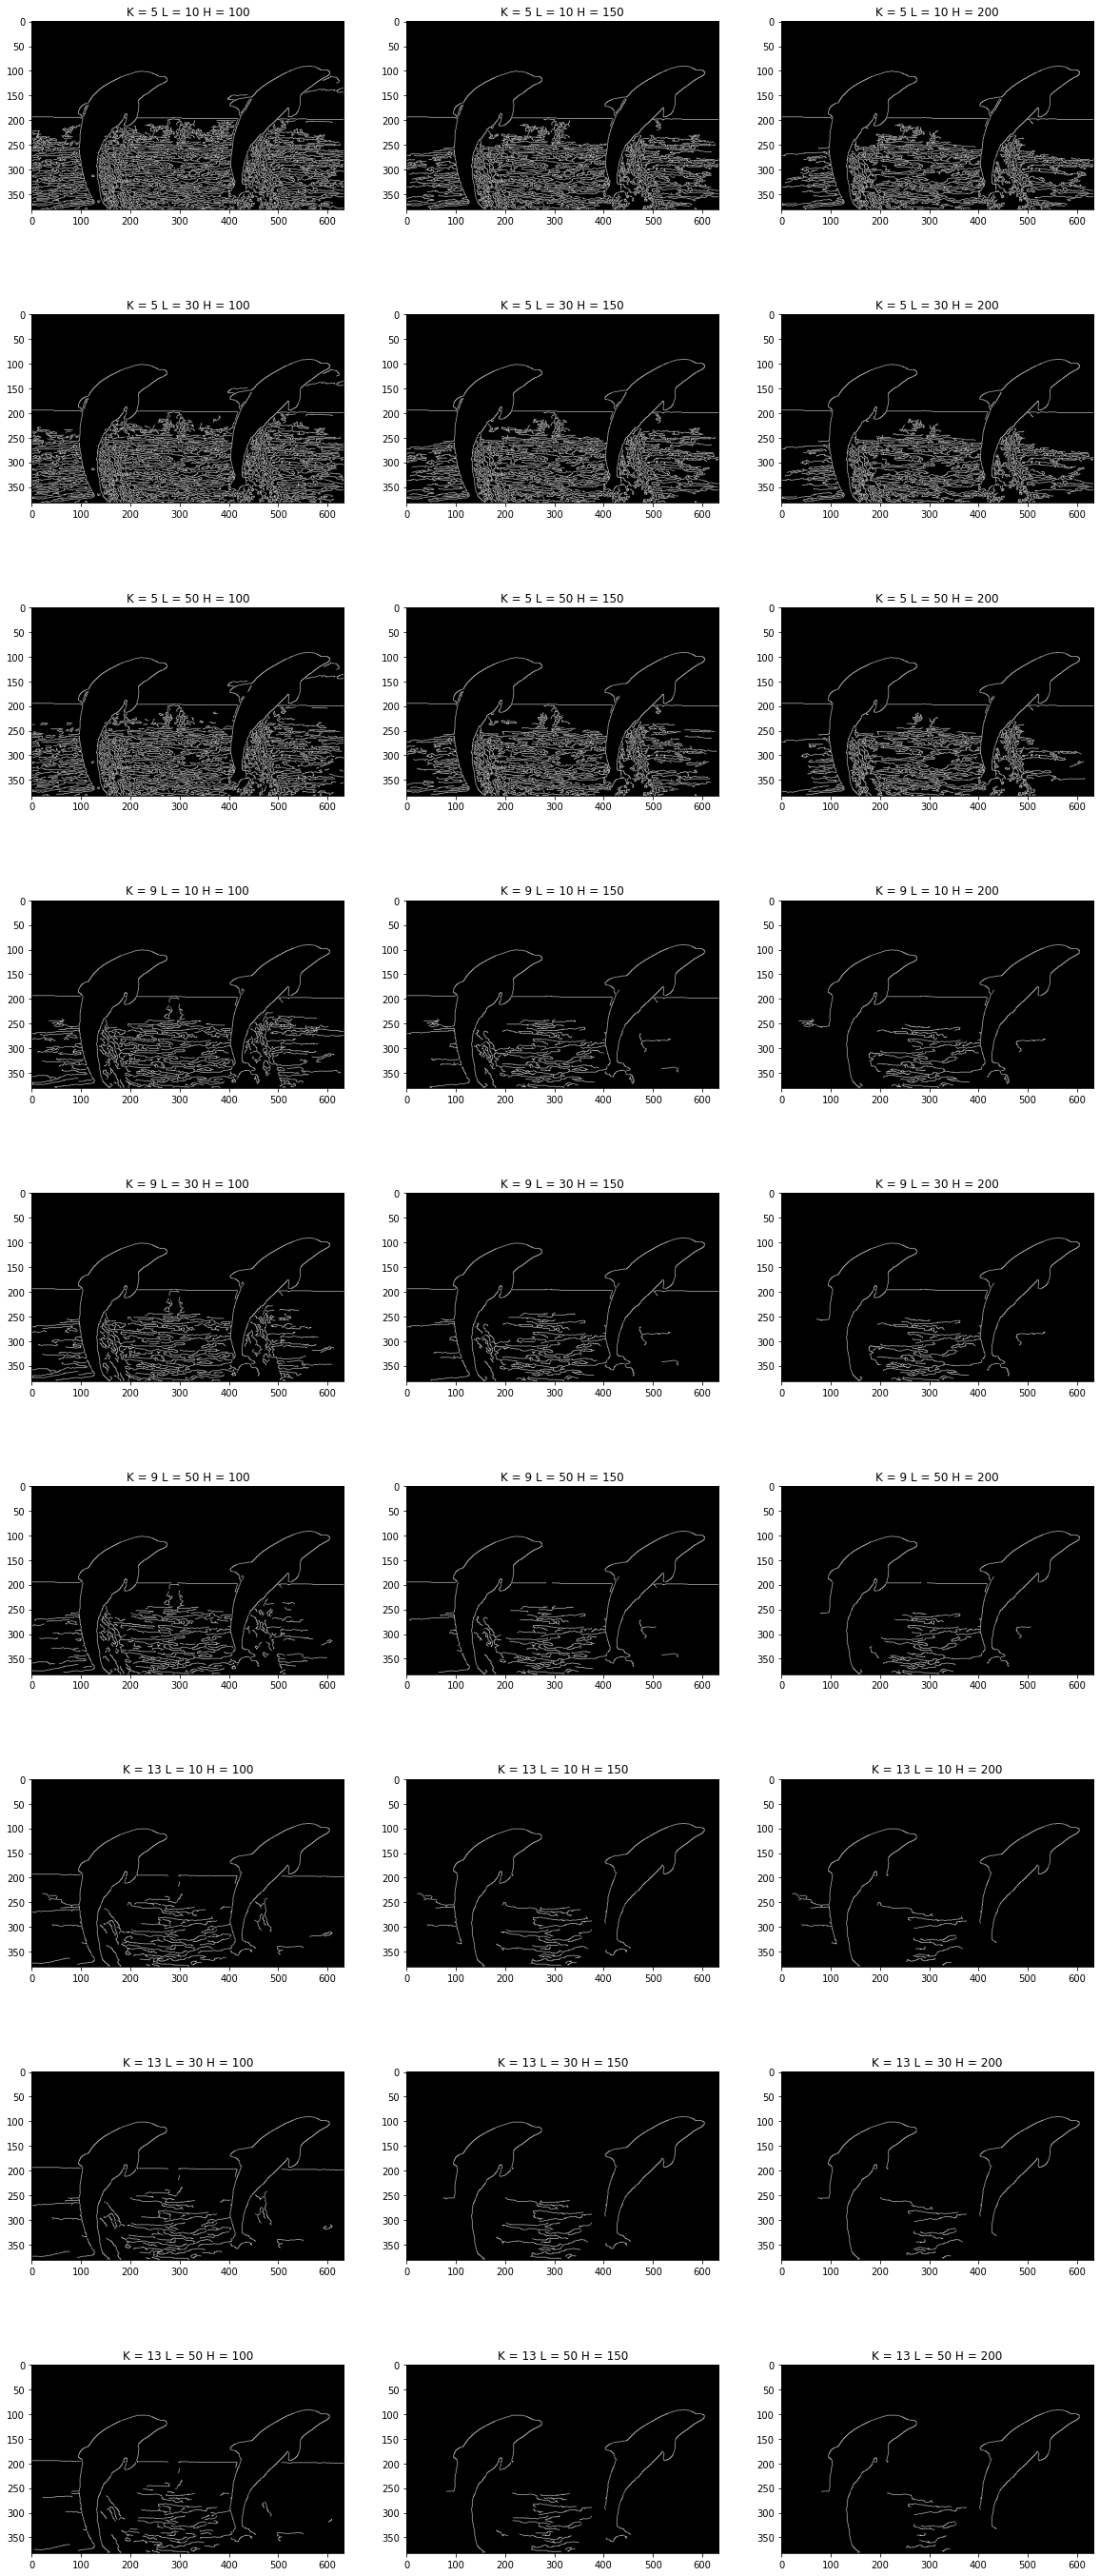

In [ ]:
#read in image
img = cv2.imread('dolphin.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(20,50))
i = 1 #index of output image
for k in [5,9,13]: #Gaussian smoothing Kernel size
  for l in [10,30,50]: #lower threshold
    for h in [100,150,200]:#higher threshold
      
      img_temp = cv2.GaussianBlur(img,(k,k),0) #gaussian blur with automatically calculated sigma
      #canny edge detection. The default Sobel operation called by Canny() has size 3x3
      img_temp = cv2.Canny(img_temp,l,h)
      plt.subplot(9,3,i),plt.imshow(img_temp,cmap="gray"),plt.title(str("K = "+str(k)+" L = "+str(l)+" H = "+str(h)))
      i = i +1 #next image
plt.show()


Increasing L, H, or K all would cause fewer edges to be present in the final image. However, the edges that remain after increasing L are less dense than what we would get by keeping L constant and increasing H. Increasing K reduces the sensitivity to noise, and it seems really effective at reducing the number of background edges--edges that are not long or large. 

(<matplotlib.image.AxesImage at 0x7f608e033b00>,
 Text(0.5, 1.0, 'K = 17 L = 30 H = 200'))

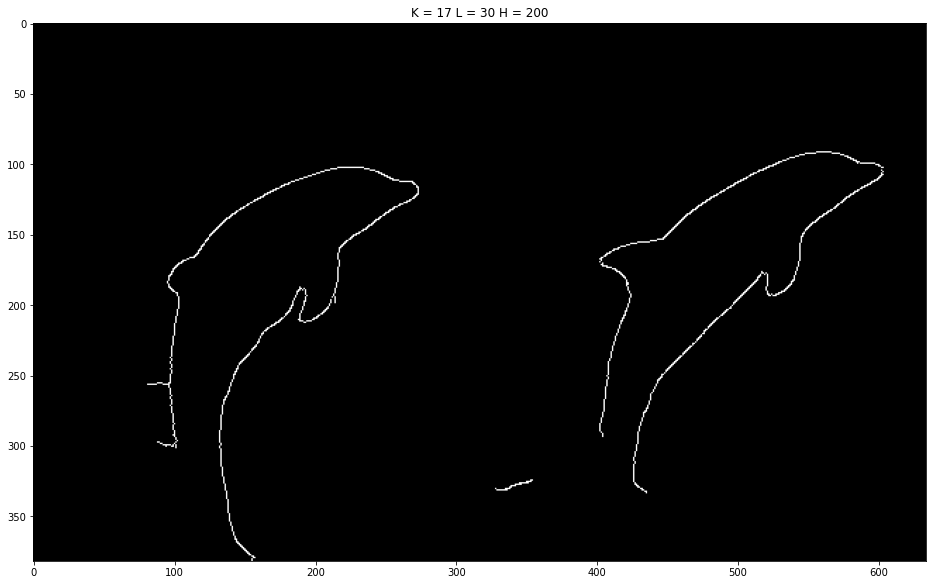

In [ ]:
#Since we know increasing L,H,K can eliminate unwanted edges, we made these parameters
#bigger. 
#The precise values are found by trial and error. 
img = cv2.imread('dolphin.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(16,18))

k = 17
l = 30
h = 200
#Blur, and Canny edge detection
img_temp = cv2.GaussianBlur(img,(k,k),0) 
img_temp = cv2.Canny(img_temp,l,h)
plt.imshow(img_temp,cmap="gray"),plt.title(str("K = "+str(k)+" L = "+str(l)+" H = "+str(h)))


In [ ]:
#This function takes a filename as input
#and output 1) the original image and 2)a matrix where the non-zero
#points indicate the Harris corner detected. 
#The Harris corner matrix is normalized, but not thresholded
def harris_corner(filename):
  #read file
  img_original = cv2.imread(filename)
  img = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)
  #Compute image derivatives with Sobel operator
  I_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
  I_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
  #Compute square of derivatives
  I_x_2 = np.square(I_x)
  I_y_2 = np.square(I_y)
  I_x_y = np.multiply(I_x,I_y)
  #Apply gaussian filtering
  I_x_2 = cv2.GaussianBlur(I_x_2,(5,5),0)
  I_y_2 = cv2.GaussianBlur(I_y_2,(5,5),0)
  I_x_y = cv2.GaussianBlur(I_x_y,(5,5),0)
  #get cornerness response function
  img_corner_res = np.multiply(I_x_2,I_y_2)-np.square(I_x_y)-0.05*np.square(I_x_2+I_y_2)
  
  #Non-maxima suppression
  M,N = img_corner_res.shape
  img_final = np.zeros_like(img_corner_res)
  
  for i in range(1,M-1): #For every pixel in the image--leaving 1 pixel gap at the sides
    for j in range(2,N-1):
      left = img_corner_res[i-1,j]
      right = img_corner_res[i+1,j]
      top = img_corner_res[i,j+1]
      bottom = img_corner_res[i,j-1]
      top_left = img_corner_res[i-1,j+1]
      bottom_left = img_corner_res[i-1,j-1]
      top_right = img_corner_res[i+1,j+1]
      bottom_right = img_corner_res[i+1,j-1]
      
      current = img_corner_res[i,j]
      #if the current pixel is not the local maximum, make it zero
      if (left>current or right>current or top>current or bottom>current or top_left>current or bottom_left>current or top_right>current or bottom_right>current):
        img_final[i,j] = 0
      else: #keep it as it is otherwise
        img_final[i,j] = current
  
  #Normalize the resulting matrix so that the min is 0 and the max is 255
  cv2.normalize(img_final, img_final, 0, 255, cv2.NORM_MINMAX)
  #return two matrices for easy comparison (note img_original is in color)
  return img_original,img_final

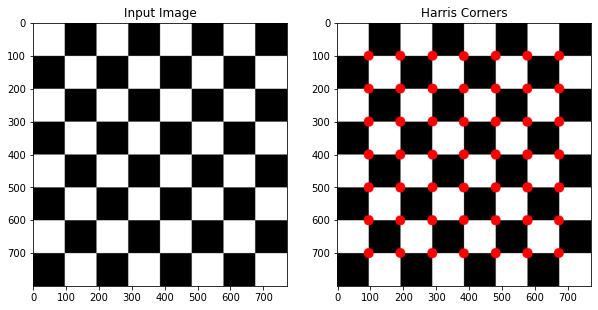

In [ ]:
img_original,img = harris_corner('checkerboard.png')
img_superimposed = img_original.copy() #we will superimpose the corners detected onto the original image

thres = 2
#generates a tuple where the first element
#is an array of X coords, and the second is an array 
#of Y coords of the points where the corner response is higher than threshold
loc = np.where(img >= thres) 

#loop though the thresholded corner points by unzipping the tuple in reverse order
for pt in zip(*loc[::-1]):

    #Draw circle at each corner detected
    cv2.circle(img_superimposed, pt, 15, (255,0,0), -1)

#display images
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img_original, cmap = "gray"),plt.title("Input Image")
plt.subplot(122), plt.imshow(img_superimposed),plt.title("Harris Corners")
plt.show()

When threshold = 0, every pixel of the image is detected as a corner. The higher the threshold, the fewer the number of corners detected. When threshold = 2, all corners are detected. When threshold = 200, only 21 corners are detected. When threshold = 255, four corners are detected. When threshold>255, no corner is detected. 



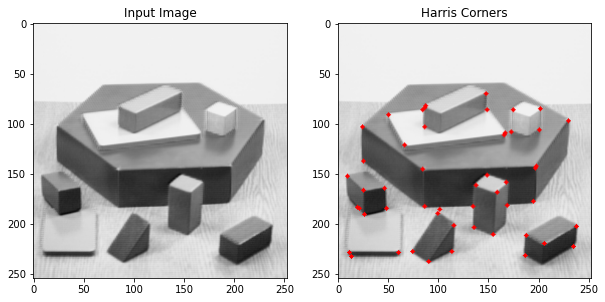

In [ ]:
#read image
img_original,img = harris_corner('shapes.png')
img_superimposed = img_original.copy()

thres = 10 #threshold

loc = np.where(img >= thres) #returns a tuple where the first is a list of X coordinates, and the second is a list of Y coord

#unzip tuple to yield the (x,y) coordinate
for pt in zip(*loc[::-1]):
    #draw circle
    cv2.circle(img_superimposed, pt, 2, (255,0,0), -1)

# display images
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img_original, cmap = "gray"),plt.title("Input Image")
plt.subplot(122), plt.imshow(img_superimposed),plt.title("Harris Corners")
plt.show()

The higher the threshold, the fewer the number of corners detected. When the threshold is five and below, almost all pixels are detected as corners. Increasing a threshold to six makes the number of corners detected reasonable. In most cases, the bottom edges of the shape got mis-detected as corners, while the corners at the far end of the shape remain undetected. Ten is a reasonable threshold

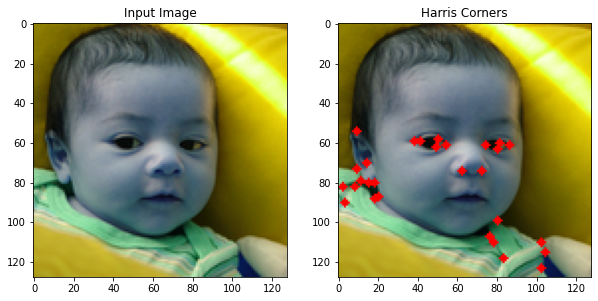

In [ ]:
img_original,img = harris_corner('face.png')
img_superimposed = img_original.copy()
thres = 20

#selects the points with value higher tha threshold;
#returns a tuple where the first is a list of X coordinates of the points, and the second is a list of Y coord of the points
loc = np.where(img >= thres) 

#loop through all the detected corners
for pt in zip(*loc[::-1]):
    # draw circle
    cv2.circle(img_superimposed, pt, 2, (255,0,0), -1)

# display images
plt.figure(figsize=(10,10))
plt.subplot(121), plt.imshow(img_original, cmap = "gray"),plt.title("Input Image")
plt.subplot(122), plt.imshow(img_superimposed),plt.title("Harris Corners")
plt.show()

The corners detected concentrate on the ear, the two eyes, the nose and the clothing at threshold = 6. At threshold = 40, the corners at the nose are no longer detected. At threshold = 55, the corners at the eyes are no longer detected. 

